<a href="https://colab.research.google.com/github/Stanleylarin/Programacion-3/blob/main/UsodeTarjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ana Carolina Guevara Rodríguez - USIS037621
Franklin Stanley Larin Saravia - USIS002421
Jacqueline Vanessa Rivas Araujo - USIS019521

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Tarjetas de crédito

In [ ]:
tarjetascredito =  pd.read_csv ("trx_tarjetas_credito.csv",  sep = ",")
print(tarjetascredito)

                        City       Date  Card Type Exp Type Gender  Amount
0               Delhi, India  29-Oct-14       Gold    Bills      F   82475
1      Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
2           Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
3      Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
4           Bengaluru, India   5-May-15       Gold    Bills      F  171574
...                      ...        ...        ...      ...    ...     ...
26047         Kolkata, India  22-Jun-14     Silver   Travel      F  128191
26048            Pune, India   3-Aug-14  Signature   Travel      M  246316
26049       Hyderabad, India  16-Jan-15     Silver   Travel      M  265019
26050          Kanpur, India  14-Sep-14     Silver   Travel      M   88174
26051       Hyderabad, India  19-Oct-13  Signature    Bills      M  184410

[26052 rows x 6 columns]


Uso de tarjetas por género

In [ ]:
genero = pd.crosstab(index = tarjetascredito["Gender"],  columns = "fr")
print(genero)

col_0      fr
Gender       
F       13680
M       12372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


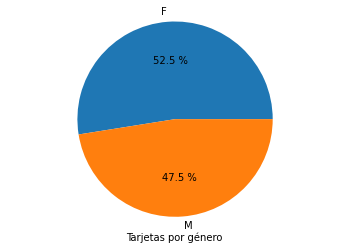

In [ ]:
genero = pd.crosstab(index = tarjetascredito ["Gender"], columns = "fr")
plt.pie(genero, labels = genero.index,autopct="%0.1f %%")
plt.xlabel("Tarjetas por género")
plt.axis("equal")
plt.show()
genero.to_csv("/content/genero.csv")

Uso de tarjetas por tipo

In [ ]:
print(tarjetascredito.groupby(by = ["Card Type"]).sum())

               Amount
Card Type            
Gold        984539536
Platinum   1007639019
Signature  1013041105
Silver     1069613713


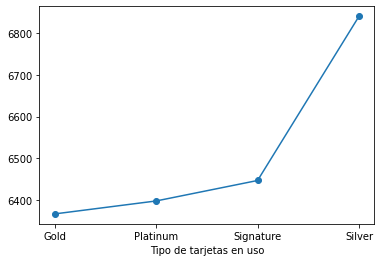

In [ ]:
tipo = pd.crosstab (index = tarjetascredito ["Card Type"], columns = "fr")
plt.scatter(tipo.index, tipo )
plt.plot(tipo.index, tipo)
plt.xlabel("Tipo de tarjetas en uso")
plt.show()
tipo.to_csv("/content/tipo.csv")

Uso de tarjeta por uso


In [ ]:
print(tarjetascredito.groupby(by = ["Exp Type"]).sum().groupby(level = [0]).cumsum())

                  Amount
Exp Type                
Bills          907072473
Entertainment  726437536
Food           824724009
Fuel           789135821
Grocery        718207923
Travel         109255611


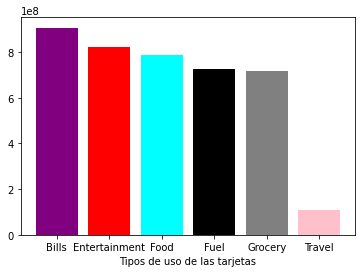

In [ ]:
from matplotlib import colorbar
tarjetas=pd.DataFrame(tarjetascredito.groupby(by=["Exp Type"])["Amount"].sum())
tarjetas=tarjetas.sort_values(by='Amount', ascending=False)
listatipoGasto=['Bills','Entertainment','Food','Fuel','Grocery','Travel']
colores= ('purple', 'red', 'cyan', 'black', 'grey', 'pink')
plt.bar(listatipoGasto, tarjetas['Amount'], color=colores)
plt.xlabel("Tipos de uso de las tarjetas")
colorbar=[]
plt.show()
tarjetas.to_csv("/content/tarjetas.csv")

Tarjetas usadas por ciudad

In [ ]:
print(tarjetascredito.groupby(by = ["City"]).sum())

                   Amount
City                     
Achalpur, India   1606641
Adilabad, India   1769464
Adityapur, India   963993
Adoni, India      1575355
Adoor, India       647725
...                   ...
Zaidpur, India     723818
Zamania, India     865634
Zira, India       1640547
Zirakpur, India    549663
Zunheboto, India   466429

[986 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


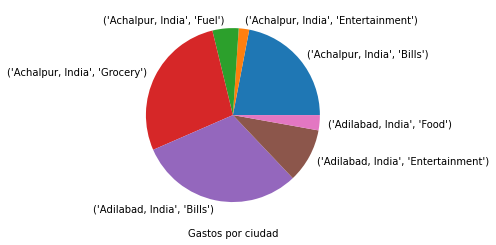

In [ ]:
gastosxtipo=pd.DataFrame(tarjetascredito.groupby(by=["City","Exp Type"])["Amount"].sum())
ciudades_con_menos_gastos=gastosxtipo.sort_values(by='Amount', ascending=False)
gastosxtipo=gastosxtipo.head(7)
plt.pie(gastosxtipo, labels = gastosxtipo.index)
plt.xlabel("Gastos por ciudad")
plt.show()
gastosxtipo.to_csv("/content/ciudad.csv")